# Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
df = pd.read_csv('07_USA_Housing.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
105,81543.777315,5.503923,5.897053,2.14,9816.300885,9.541145e+05,Unit 5889 Box 7282\nDPO AE 41177-0399
3131,70444.462733,4.717136,7.883996,3.46,41919.583939,1.209964e+06,USS Wade\nFPO AP 69783
3015,74227.495234,6.990677,6.833956,2.46,25934.649200,1.426696e+06,"1838 Robert Loaf\nElizabethstad, IA 77627-5234"
3368,79574.719260,7.264981,7.882910,4.46,24884.696584,1.546409e+06,"7892 Stephens Tunnel\nPort Kellyburgh, FL 39240"
3812,47904.685511,6.285249,8.051999,3.40,33853.919599,8.840152e+05,Unit 3397 Box 4463\nDPO AA 91280


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
df['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [11]:
df[['Avg. Area Income', 'Price']]

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


In [12]:
df['Price'].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

## Plotting individual variables to see distribution (Univariate analysis)

<AxesSubplot:>

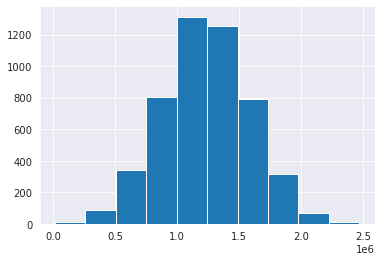

In [13]:
df['Price'].hist()

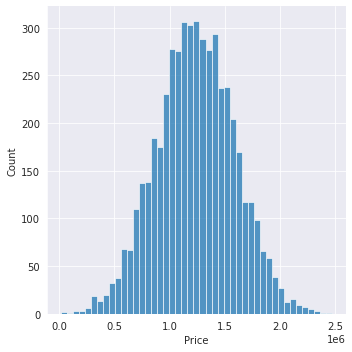

In [14]:
# sns.displot(data=df, x='Price', bins=20)
sns.displot(data=df, x='Price')

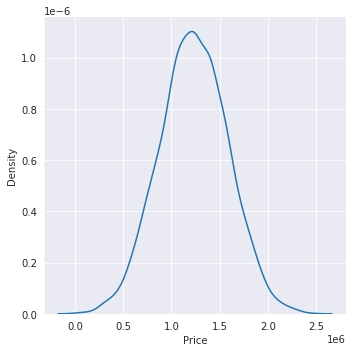

In [15]:
sns.displot(data=df, x='Price', kind='kde')

<AxesSubplot:xlabel='Price', ylabel='Count'>

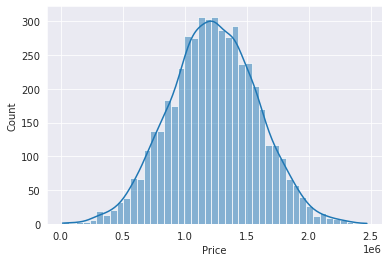

In [16]:
sns.histplot(data=df, x='Price', kde=True)

In [17]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   5.,  13.,  17.,
         32.,  50.,  61., 105., 130., 179., 227., 273., 376., 369., 394.,
        416., 422., 388., 372., 303., 241., 193., 132., 104.,  84.,  39.,
         27.,  25.,  11.,   3.,   4.,   1.,   1.]),
 array([ 17796.63118954,  20044.25911925,  22291.88704895,  24539.51497865,
         26787.14290835,  29034.77083806,  31282.39876776,  33530.02669746,
         35777.65462716,  38025.28255686,  40272.91048657,  42520.53841627,
         44768.16634597,  47015.79427567,  49263.42220538,  51511.05013508,
         53758.67806478,  56006.30599448,  58253.93392419,  60501.56185389,
         62749.18978359,  64996.81771329,  67244.445643  ,  69492.0735727 ,
         71739.7015024 ,  73987.3294321 ,  76234.95736181,  78482.58529151,
         80730.21322121,  82977.84115091,  85225.46908062,  87473.09701032,
         89720.72494002,  91968.35286972,  94215.98079942,  96463.60872913,
         98711.23665883, 100958.86458853, 

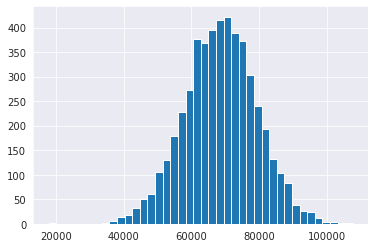

In [42]:
plt.hist(x=df['Avg. Area Income'], bins=40)

## Bivariate analysis (Finding relations between 2 variables)

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Price'>

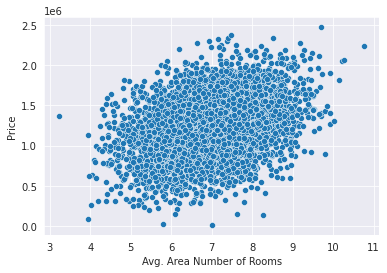

In [18]:
sns.scatterplot(data=df, x='Avg. Area Number of Rooms', \
                y='Price')

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Price'>

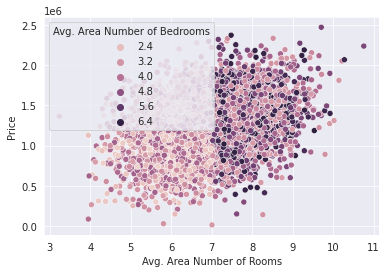

In [19]:
sns.scatterplot(data=df, x='Avg. Area Number of Rooms', \
                y='Price', hue='Avg. Area Number of Bedrooms')

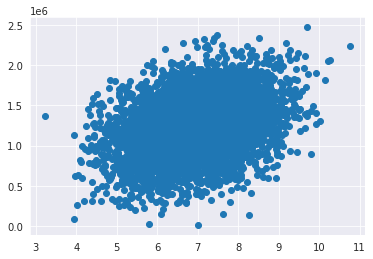

In [20]:
plt.scatter(x=df['Avg. Area Number of Rooms'], y=df['Price'])

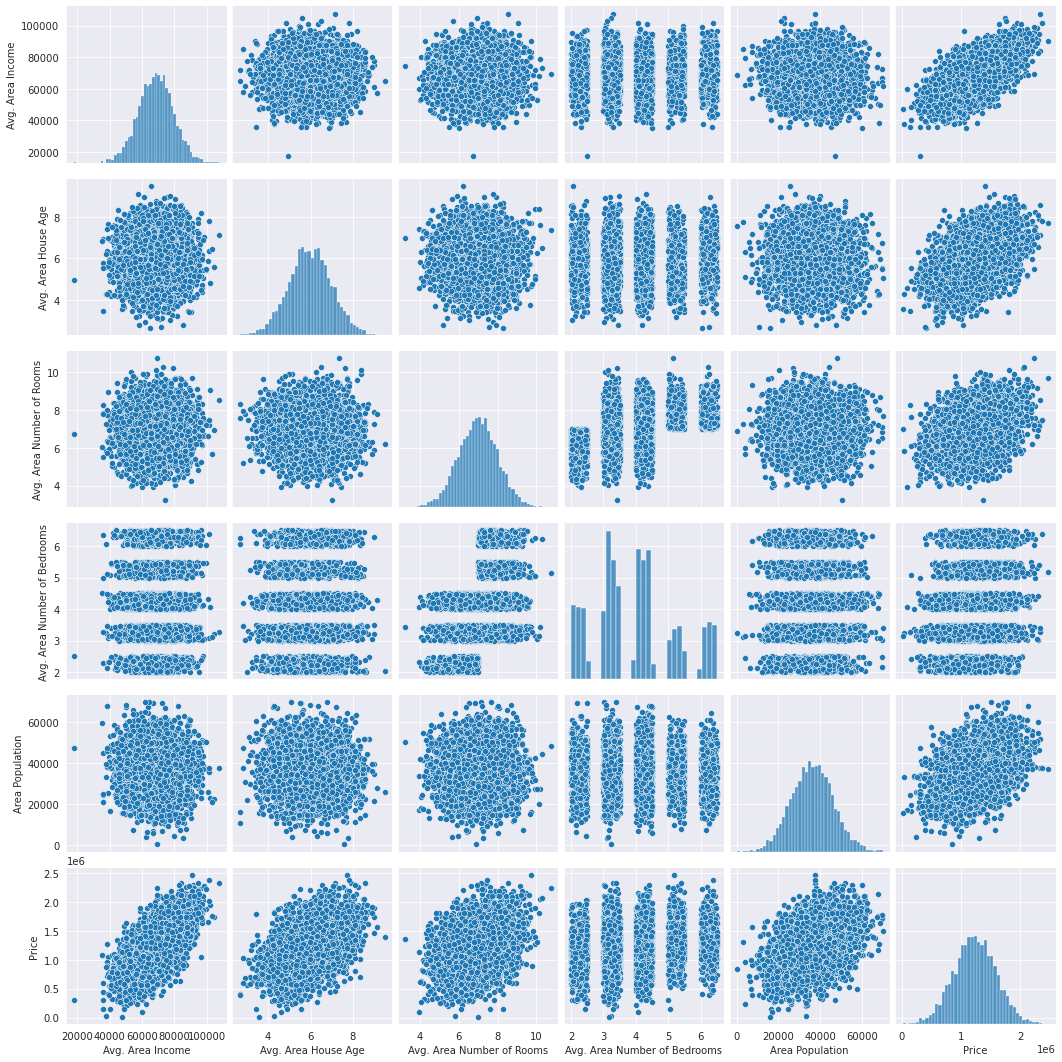

In [21]:
sns.pairplot(df)

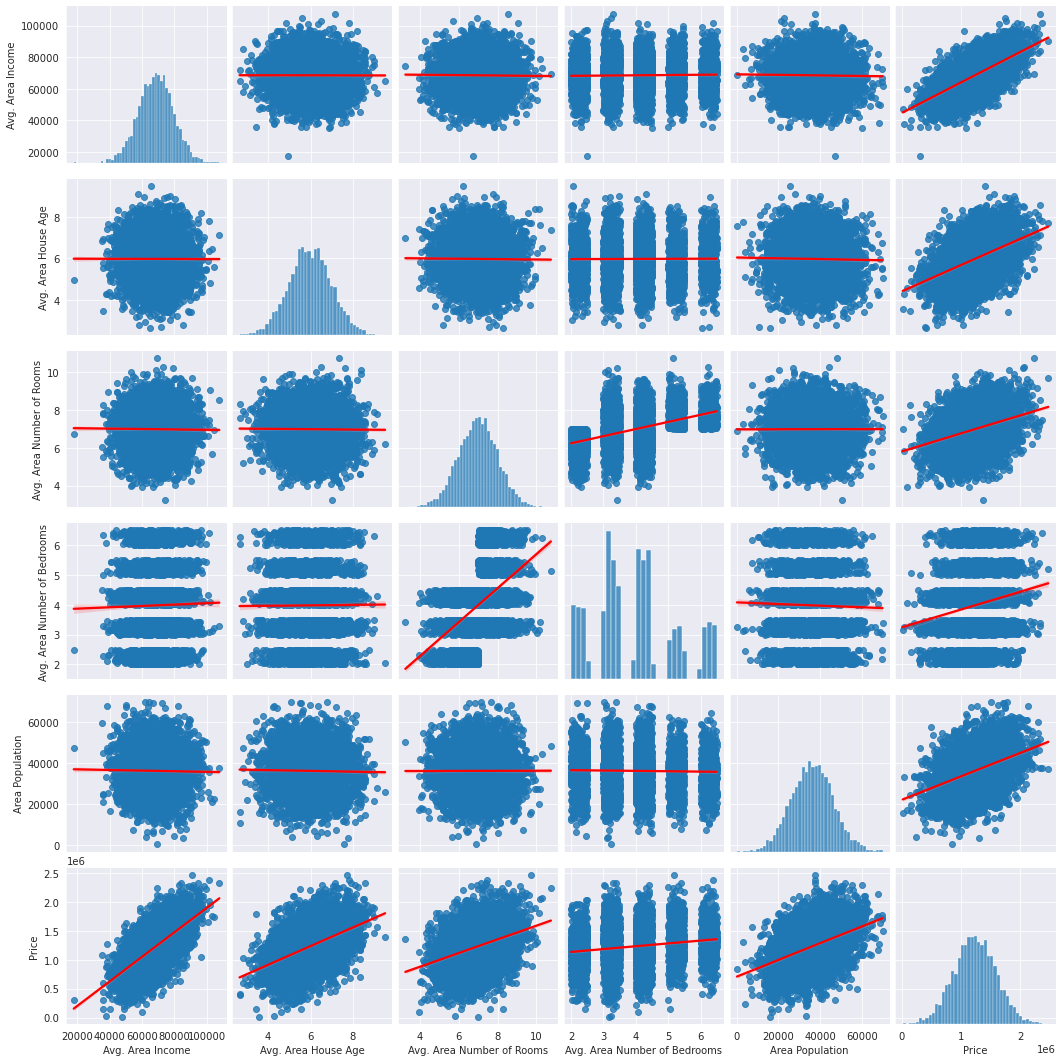

In [22]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

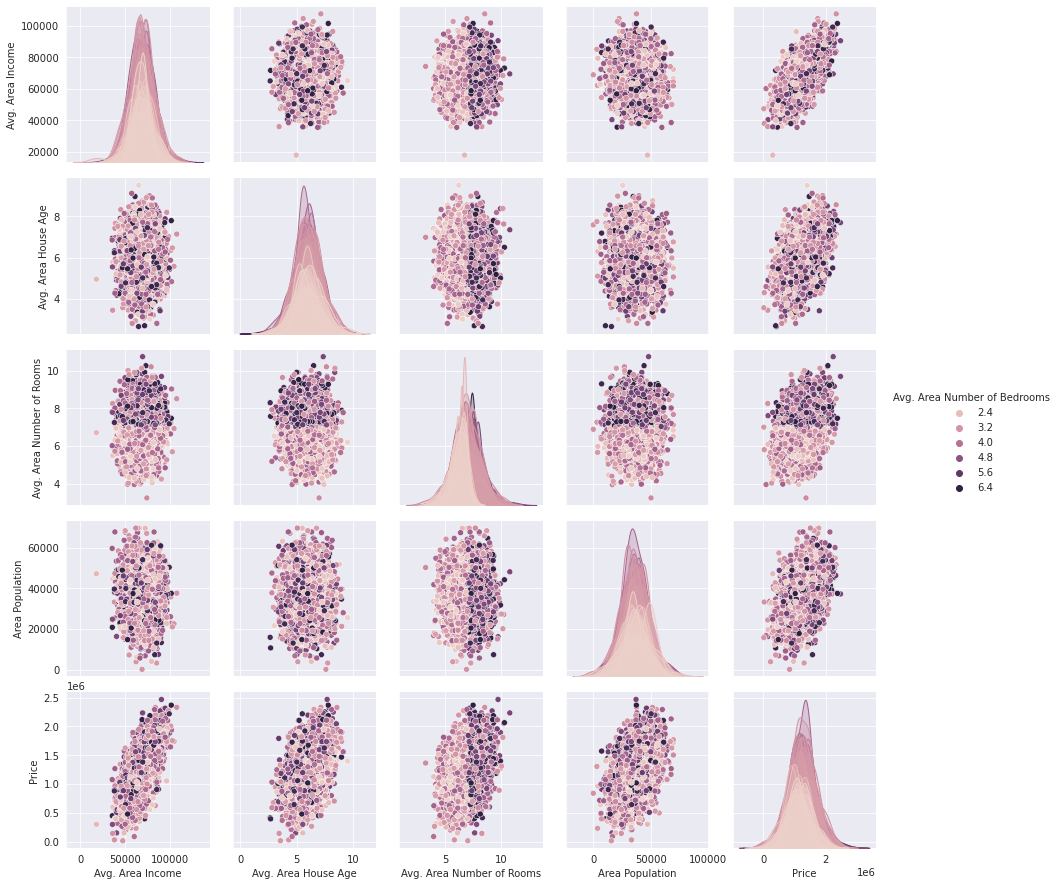

In [47]:
sns.pairplot(data=df, hue='Avg. Area Number of Bedrooms')

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [24]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [25]:
df = df.drop(['Address'], axis=1)

In [26]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

### Correlations

In [27]:
cor = df.corr()
cor

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

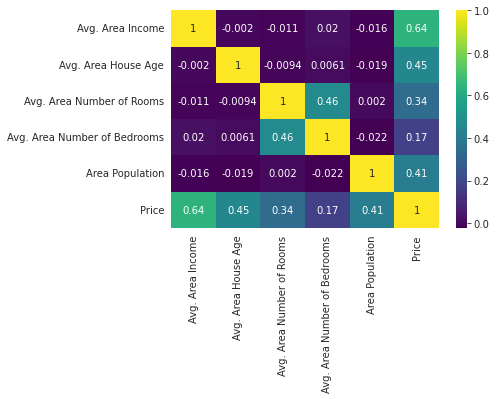

In [28]:
sns.heatmap(cor, cmap='viridis', annot=True)

# Training Linear Regression Model

## Splitting into Train and Test data

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [96]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [97]:
y = df['Price']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=420)

In [110]:
X_train.shape

(3350, 5)

In [111]:
X_test.shape

(1650, 5)

In [112]:
X.shape

(5000, 5)

## Training Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lm = LinearRegression()

In [104]:
lm.fit(X_train, y_train)

LinearRegression()

In [105]:
lm.intercept_

-2640533.032567214

In [106]:
lm.coef_

array([ 2.16341816e+01,  1.66131167e+05,  1.21007234e+05, -1.58205012e+02,
        1.52359208e+01])

In [107]:
pd.DataFrame(data=lm.coef_)

,0
0,21.634182
1,166131.166794
2,121007.233889
3,-158.205012
4,15.235921


In [108]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [113]:
pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.634182
Avg. Area House Age,166131.166794
Avg. Area Number of Rooms,121007.233889
Avg. Area Number of Bedrooms,-158.205012
Area Population,15.235921


In [77]:
y_pred = lm.predict(X_train)

<AxesSubplot:xlabel='Price'>

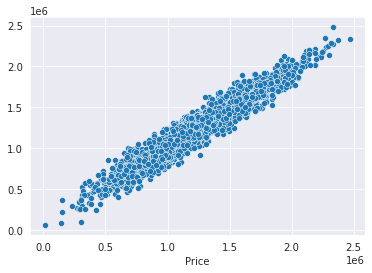

In [78]:
%matplotlib inline
sns.scatterplot(x=y_train, y=y_pred)

<AxesSubplot:xlabel='Price', ylabel='Count'>

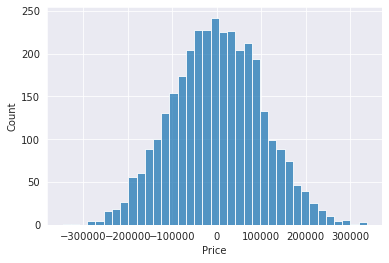

In [79]:
residual = y_pred-y_train
sns.histplot(residual)

## Evaluating model predictions on *train* data

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:
mean_error = residual.sum()/residual.size
mean_error

-3.4556237619314623e-10

In [82]:
mean_squared_error(y_train, y_pred)

10262840503.760548

In [86]:
root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_pred))
print("root_mean_squared_error: ", root_mean_squared_error)

root_mean_squared_error:  101305.67853659808


In [87]:
mean_absolute_error(y_train, y_pred)

81367.69686812525

### r2 or r squared score or goodness of fit

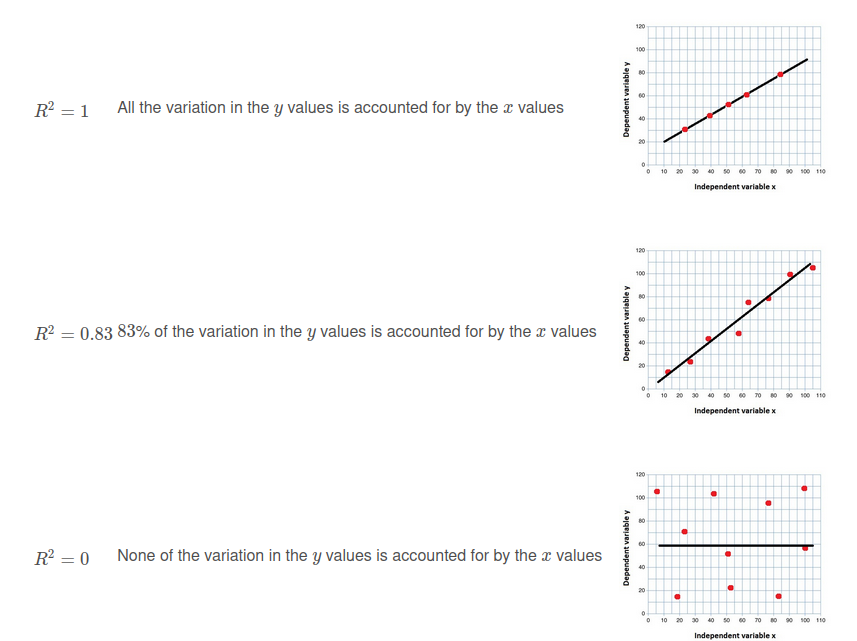

In [88]:
r2_score(y_train, y_pred)

0.9172858170735596

## Evaluating model predictions on *test* data

In [89]:
y_pred_test = lm.predict(X_test)

In [90]:
mean_squared_error(y_test, y_pred_test)

10147536700.55689

In [91]:
mean_absolute_error(y_test, y_pred_test)

81313.9723512843

In [93]:
r2_score(y_test, y_pred_test)

0.9191089885749432

# Conclusions

r2 score on train and test data is similar around **0.91**. This high r2 score means that the linear regression model gives good predictions and is suitable for the current dataset.